- *PREPROCESSING*

In [20]:
import pandas as pd
# file = candidates_clean+.csv
PREFERENZE = pd.read_csv("C:/Users/al3ss/Desktop/europee_2019/data/preferences.csv")



# Removing the first column
PREFERENZE = PREFERENZE.iloc[:, 1:]

# Changing column names
old_names = ['circoscrizione', 'regione', 'provincia', 'comune', 'descrlista','votilista', 'cognome', 'nome', 'datanascita', 'luogonascita', 'sesso','PREFERENZE', 'CODTIPOELETTO']
new_names = ["CIRCOSCRIZIONE", "REGIONE", "PROVINCIA", "COMUNE", "LISTA", "VOTILISTA", "COGNOME", "NOME", "DATANASCITA", "LUOGONASCITA", "SESSO", "PREFERENZE", "ELETTO"]
PREFERENZE.columns = new_names

# Converting PREFERENZE and VOTILISTA to numeric
PREFERENZE["VOTILISTA"] = pd.to_numeric(PREFERENZE["VOTILISTA"], errors='coerce')
PREFERENZE["PREFERENZE"] = pd.to_numeric(PREFERENZE["PREFERENZE"], errors='coerce')

# Add Europarlamentare Column
# Lista dei nomi e cognomi degli europarlamentari
nomi_europarlamentari = {
("ALDO", "PATRICIELLO"),
("ALESSANDRA", "BASSO"),
("ALESSANDRA", "MORETTI"),
("ALESSANDRO", "PANZA"),
("ANDREA", "CAROPPO"),
("ANDREA", "COZZOLINO"),
("ANGELO", "CIOCCA"),
("ANNA", "BONFRISCO"),
("ANNALISA", "TARDINO"),
("ANTONIO MARIA", "RINALDI"),
("ANTONIO", "TAJANI"),
("BRANDO MARIA", "BENIFEI"),
("CARLO", "CALENDA"),
("CARLO", "FIDANZA"),
("CATERINA", "CHINNICI"),
("CHIARA MARIA", "GEMMA"),
("DANIELA", "RONDINELLI"),
("DANILO OSCAR", "LANCINI"),
("DAVID MARIA", "SASSOLI"),
("DINO RICCARDO MARIA", "GIARRUSSO"),
("ELENA", "LIZZI"),
("ELEONORA", "EVI"),
("ELISABETTA", "GUALMINI"),
("FABIO MASSIMO", "CASTALDO"),
("FRANCESCA", "DONATO"),
("FRANCO", "ROBERTI"),
("FULVIO", "MARTUSCIELLO"),
("GIANANTONIO", "DA RE"),
("GIANNA", "GANCIA"),
("GIULIANO", "PISAPIA"),
("GIUSEPPE", "FERRANDINO"),
("GIUSEPPE", "MILAZZO"),
("GIUSEPPINA", "PICIERNO"),
("HERBERT", "DORFMANN"),
("IGNAZIO", "CORRAO"),
("IRENE", "TINAGLI"),
("ISABELLA", "ADINOLFI"),
("ISABELLA", "TOVAGLIERI"),
("LAURA", "FERRARA"),
("LUCIA", "VUOLO"),
("LUISA", "REGIMENTI"),
("MARA", "BIZZOTTO"),
("MARCO", "CAMPOMENOSI"),
("MARCO", "DREOSTO"),
("MARCO", "ZANNI"),
("MARCO", "ZULLO"),
("MARIO", "FURORE"),
("MASSIMILIANO", "SALINI"),
("MASSIMILIANO", "SMERIGLIO"),
("MASSIMO", "CASANOVA"),
("MATTEO", "ADINOLFI"),
("NICOLA", "PROCACCINI"),
("PAOLO", "BORCHIA"),
("PAOLO", "DE CASTRO"),
("PATRIZIA FERMA FRANCESCA", "TOIA"),
("PIERFRANCESCO", "MAJORINO"),
("PIERNICOLA", "PEDICINI"),
("PIETRO", "BARTOLO"),
("PIETRO", "FIOCCHI"),
("RAFFAELE", "FITTO"),
("RAFFAELE", "STANCANELLI"),
("ROBERTO", "GUALTIERI"),
("ROSA", "D'AMATO"),
("ROSANNA", "CONTE"),
("SABRINA", "PIGNEDOLI"),
("SALVATORE", "DE MEO"),
("SERGIO ANTONIO", "BERLATO"),
("SILVIA SERAFINA", "SARDONE"),
("SILVIO", "BERLUSCONI"),
("SIMONA", "BONAFE'"),
("SIMONA RENATA", "BALDASSARRE"),
("STEFANIA", "ZAMBELLI"),
("SUSANNA", "CECCARDI"),
("TIZIANA", "BEGHIN"),
("VALENTINO", "GRANT"),
("VINCENZO", "SOFO")}

# Crea un DataFrame per gli europarlamentari
df_europarlamentari = pd.DataFrame(nomi_europarlamentari, columns=["NOME", "COGNOME"])
df_europarlamentari['EUROPARLAMENTARE'] = 'S'
# Esegui il merge per aggiungere la colonna EUROPARLAMENTARE
PREFERENZE= pd.merge(PREFERENZE, df_europarlamentari, on=["NOME", "COGNOME"], how="left")

# Imposta 'N' per i valori NaN (che indicano non europarlamentari)
PREFERENZE['EUROPARLAMENTARE'] = PREFERENZE['EUROPARLAMENTARE'].fillna('N')

PREFERENZE.head()

CIRCOSCRIZIONE  REGIONE      PROVINCIA   COMUNE  \
0  iii : italia centrale  toscana  massa carrara  tresana   
1  iii : italia centrale  toscana  massa carrara  tresana   
2  iii : italia centrale  toscana  massa carrara  tresana   
3  iii : italia centrale  toscana  massa carrara  tresana   
4  iii : italia centrale  toscana  massa carrara  tresana   

                                     LISTA  VOTILISTA  \
0                             EUROPA VERDE         17   
1                             EUROPA VERDE         17   
2  +EUROPA - ITALIA IN COMUNE - PDE ITALIA         15   
3  +EUROPA - ITALIA IN COMUNE - PDE ITALIA         15   
4  +EUROPA - ITALIA IN COMUNE - PDE ITALIA         15   

                   COGNOME      NOME        DATANASCITA LUOGONASCITA SESSO  \
0                  ZIMARRI   UMBERTO  12/19/89 00:00:00    frosinone     M   
1                ARMELLINI   CECILIA  06/25/60 00:00:00      firenze     F   
2                   BONINO      EMMA  03/09/48 00:00:00          bra     F   
3                 TARADASH     MARCO  05/19/50 00:00:00      livorno     M   
4  HERMANIN DE REICHENFELD  COSTANZA  06/02/81 00:00:00      firenze     F   

   PREFERENZE ELETTO EUROPARLAMENTARE  
0           0      N                N  
1           1      N                N  
2           2      N                N  
3           0      N                N  
4           0      N                N

- *SOME INFORMATION*

In [21]:
#VOTI TOTALI
A =PREFERENZE[['CIRCOSCRIZIONE', 'COMUNE','LISTA','VOTILISTA']].drop_duplicates()
print("VOTI TOTALI:\t    "+str(sum(A['VOTILISTA'])))

# CANDIDATES: Keep only 'NOME', 'COGNOME', 'LUOGONASCITA'
CANDIDATI = PREFERENZE[["COGNOME", "NOME", "LUOGONASCITA"]].drop_duplicates()
print("CANDIDATI TOTALI:\t " + str((CANDIDATI.shape)[0]))  # Should print (940, 3)

# COMMUNI: Keep only "PROVINCIA", "COMUNE"
COMUNI = PREFERENZE[["PROVINCIA", "COMUNE"]].drop_duplicates()
print("COMUNI TOTALI: \t\t" + str(((COMUNI.shape)[0])))  # Should print (7915, 2)
print()
# N preferenze
N = PREFERENZE['PREFERENZE'].sum()
print("PREFERENZE TOTALI:  " + str(N) + ", DI CUI:")
# PREFERENZE PER CIRCOSCRIZIONE
PREFERENZE_CIRCOSCRIZIONE = (PREFERENZE.groupby(["CIRCOSCRIZIONE"])
                  .agg(PREFERENZE_CIRCOSCRIZIONE=("PREFERENZE", "sum"))
                  .reset_index())
N_PREFERENZE_ITALIA_NORD_OCCIDENTALE = PREFERENZE_CIRCOSCRIZIONE.iloc[0, 1]
P1= round(((N_PREFERENZE_ITALIA_NORD_OCCIDENTALE/ N) * 100),2)
N_PREFERENZE_ITALIA_NORD_ORIENTALE= PREFERENZE_CIRCOSCRIZIONE.iloc[1, 1]
P2= round(((N_PREFERENZE_ITALIA_NORD_ORIENTALE/ N) * 100),2)
N_PREFERENZE_ITALIA_CENTRALE = PREFERENZE_CIRCOSCRIZIONE.iloc[2, 1]
P3= round(((N_PREFERENZE_ITALIA_CENTRALE/ N) * 100),2)
N_PREFERENZE_ITALIA_MERIDIONALE = PREFERENZE_CIRCOSCRIZIONE.iloc[3, 1]
P4= round(((N_PREFERENZE_ITALIA_MERIDIONALE/ N) * 100),2)
N_PREFERENZE_ITALIA_INSULARE = PREFERENZE_CIRCOSCRIZIONE.iloc[4, 1]
P5= round(((N_PREFERENZE_ITALIA_INSULARE/ N) * 100),2)
print("I\tPREFERENZE ITALIA NORD OCCIDENTALE:\t" + str(N_PREFERENZE_ITALIA_NORD_OCCIDENTALE) + "\t(" + str(P1) + "%)")
print("II\tPREFERENZE ITALIA NORD ORIENTALE:\t" + str(N_PREFERENZE_ITALIA_NORD_ORIENTALE) + "\t(" + str(P2) + "%)")
print("III\tPREFERENZE ITALIA CENTRALE:\t\t" + str(N_PREFERENZE_ITALIA_CENTRALE) + "\t(" + str(P3) + "%)")
print("IV\tPREFERENZE ITALIA MERIDIONALE:\t\t" + str(N_PREFERENZE_ITALIA_MERIDIONALE) + "\t(" + str(P4) + "0%)")
print("V\tPREFERENZE ITALIA INSULARE:\t\t" + str(N_PREFERENZE_ITALIA_INSULARE)+ "\t(" + str(P5) + "%)")

PREFERENZE_PARTITI = (PREFERENZE.groupby(["LISTA"])
                  .agg(PREFERENZE_PARTITI =("PREFERENZE", "sum"))
                  .reset_index())
PREFERENZE_PARTITI = PREFERENZE_PARTITI.sort_values(by="PREFERENZE_PARTITI", ascending=False)

print()
print("DI QUESTE PREFERENZE:")

altri = N
for i, partito in enumerate(PREFERENZE_PARTITI["LISTA"]):
    if i == 5:
        perc = "\t( " + str(round(altri/N * 100,2)) + "%)"
        print("-\t"+ "ALTRI < 3%:" + "\t\t\t" + str(altri) + perc)
        break
    pref = PREFERENZE_PARTITI.iloc[i, 1]
    altri -=  PREFERENZE_PARTITI.iloc[i, 1]
    fract = (PREFERENZE_PARTITI.iloc[i, 1]/N)* 100
    perc = str()
    if partito == "FRATELLI D'ITALIA":  perc = "\t( " + str(round(fract,2)) + "%)" 
    else: perc = "\t(" + str(round(fract,2)) + "%)"
    tab = "\t\t"
    if partito == "FORZA ITALIA" :tab= "\t\t\t"

    

    print("-\t"+ partito + ":" + tab + str(pref) + perc)
    


VOTI TOTALI:	    26662962
CANDIDATI TOTALI:	 940
COMUNI TOTALI: 		7915

PREFERENZE TOTALI:  13031492, DI CUI:
I	PREFERENZE ITALIA NORD OCCIDENTALE:	2678652	(20.56%)
II	PREFERENZE ITALIA NORD ORIENTALE:	2400039	(18.42%)
III	PREFERENZE ITALIA CENTRALE:		2538376	(19.48%)
IV	PREFERENZE ITALIA MERIDIONALE:		3466253	(26.60%)
V	PREFERENZE ITALIA INSULARE:		1948172	(14.95%)

DI QUESTE PREFERENZE:
-	LEGA SALVINI PREMIER:		4020919	(30.86%)
-	PARTITO DEMOCRATICO:		3689015	(28.31%)
-	FORZA ITALIA:			1551813	(11.91%)
-	MOVIMENTO 5 STELLE:		1432662	(10.99%)
-	FRATELLI D'ITALIA:		1209773	( 9.28%)
-	ALTRI < 3%:			1127310	( 8.65%)


- *VIUSALIZZAZIONE CANDIDATI PER CIRCOSCRIZIONE ATTRAVERSO DIAGRAMMI DI PARETO*

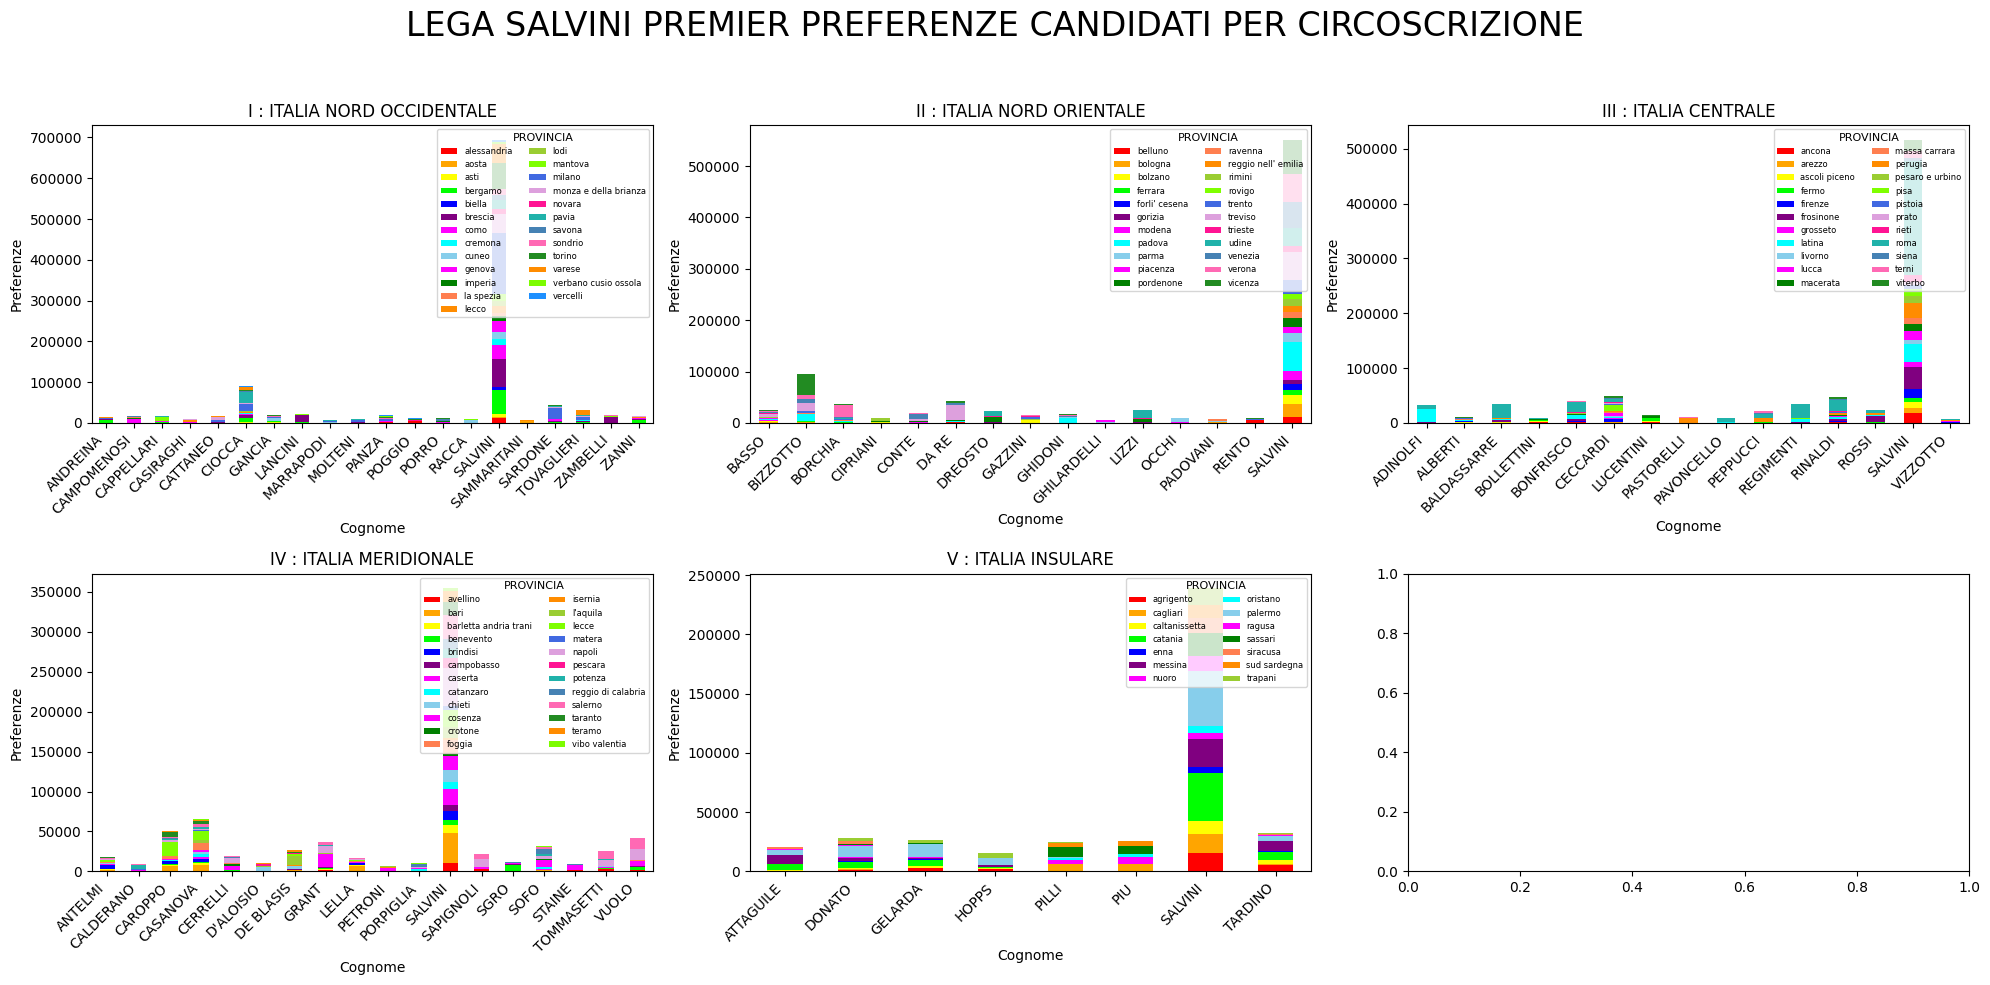

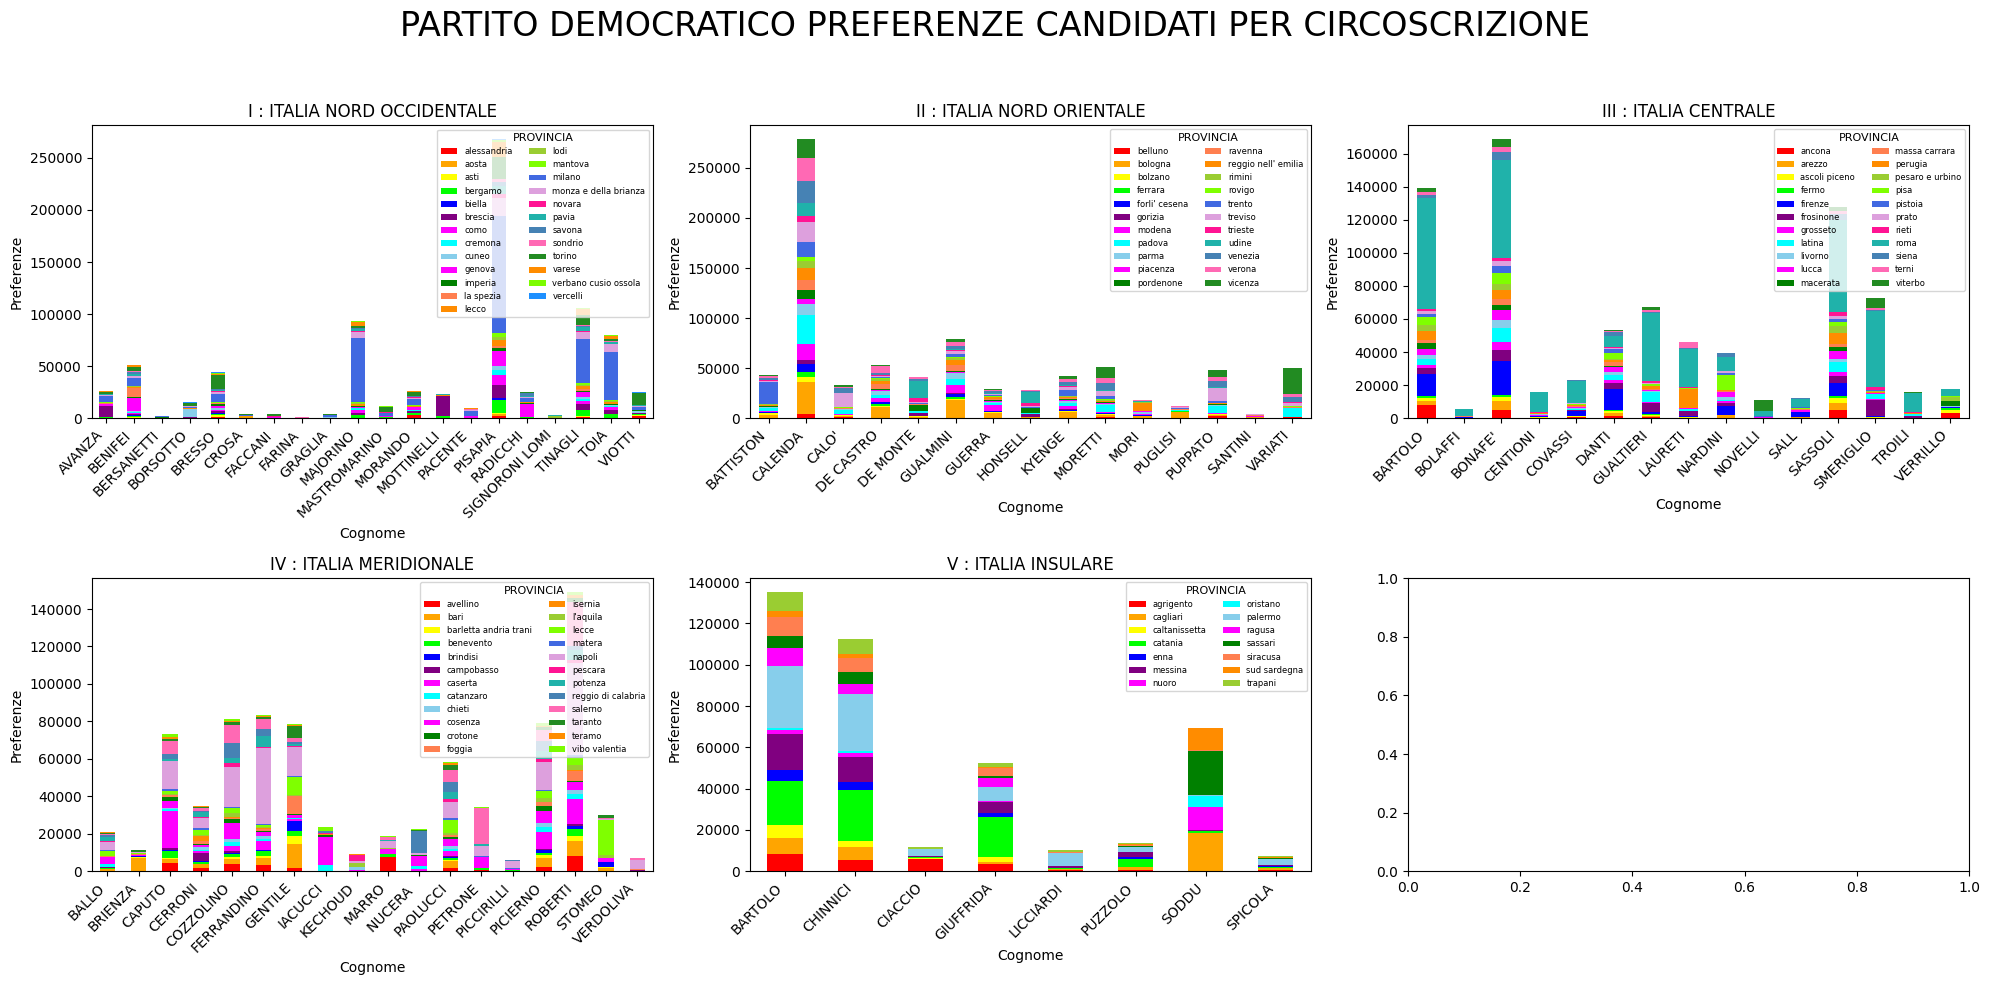

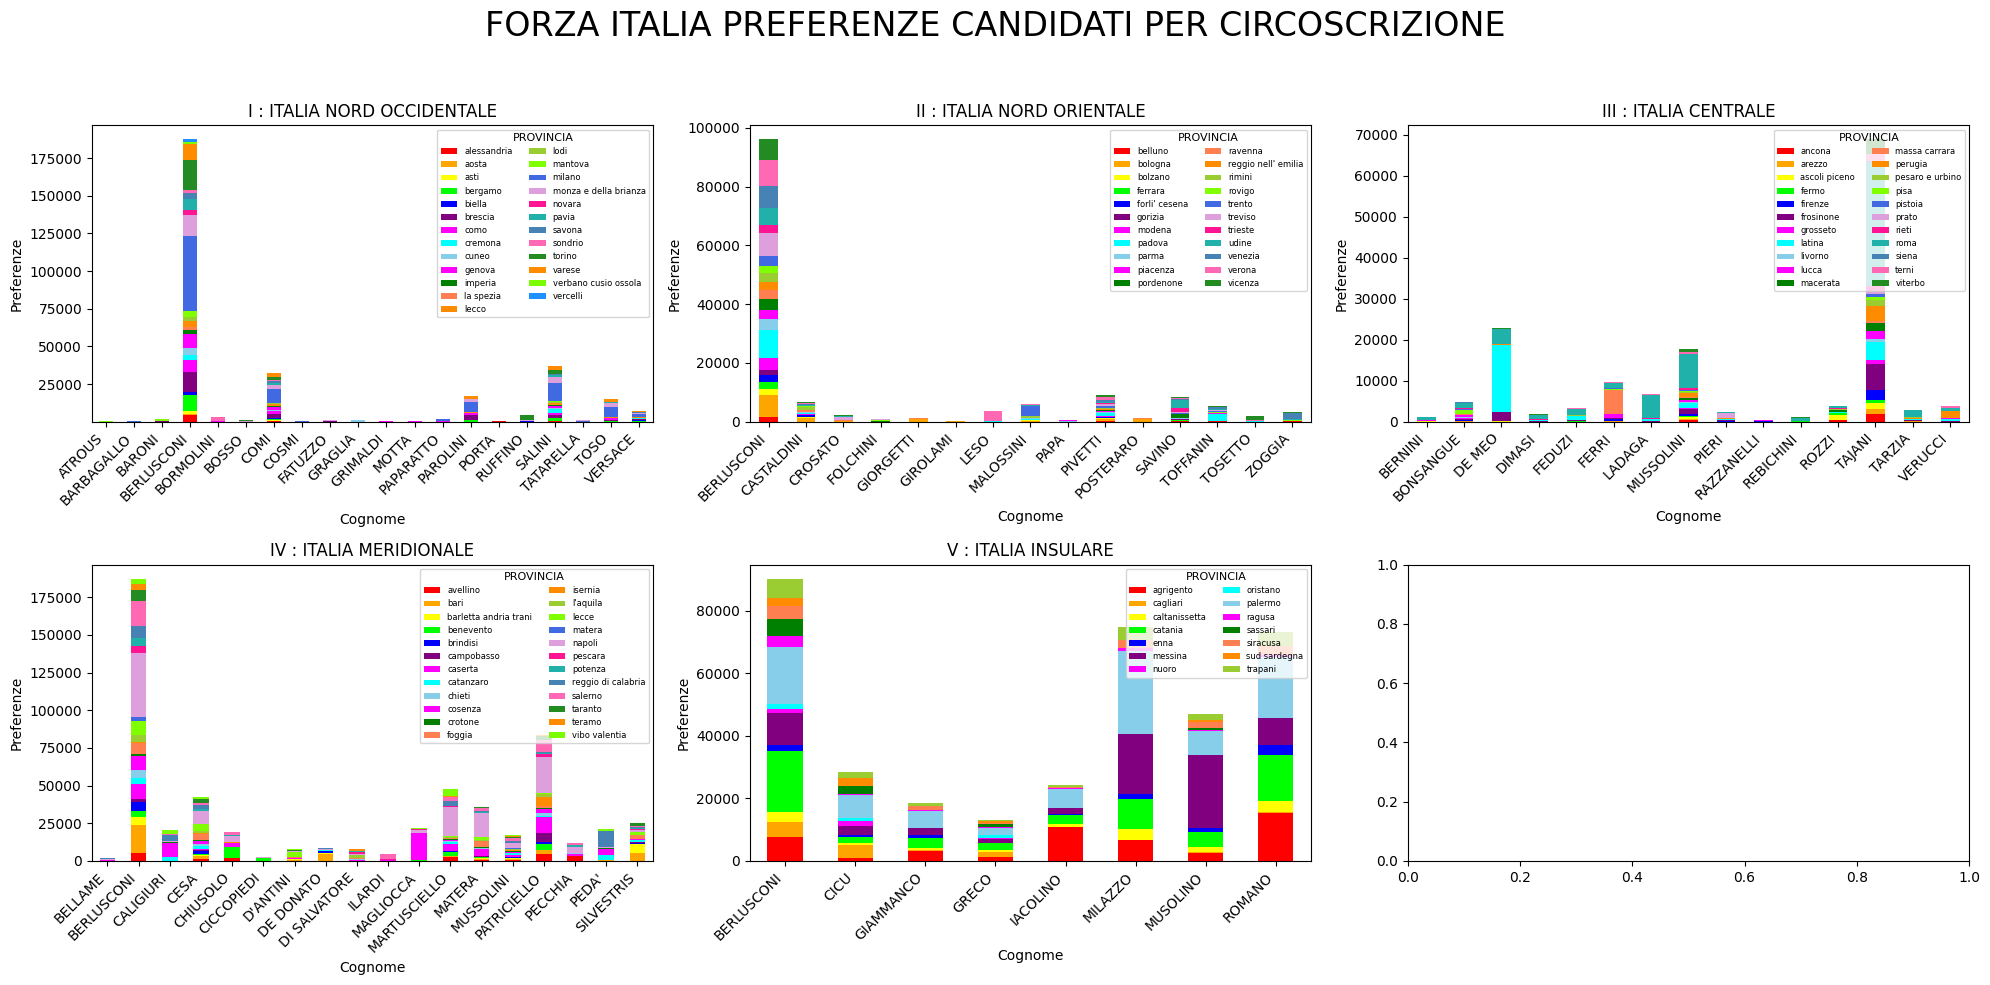

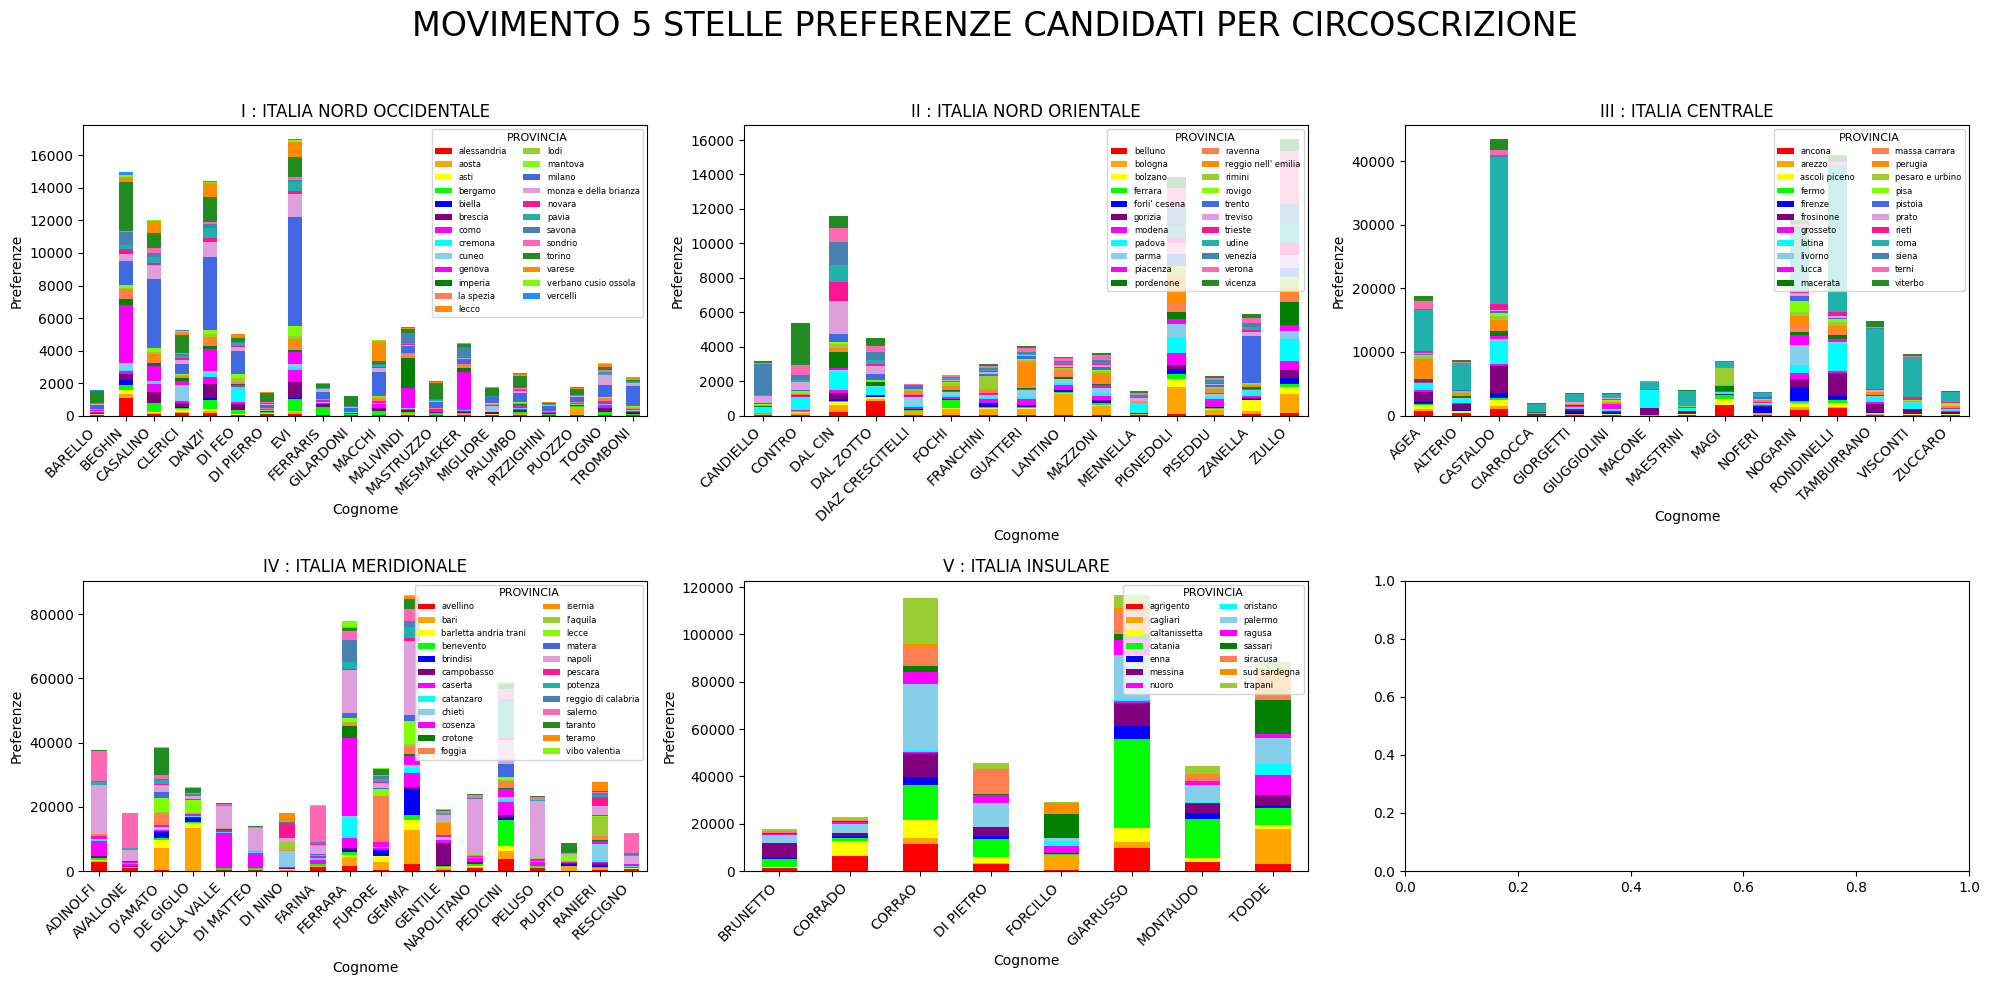

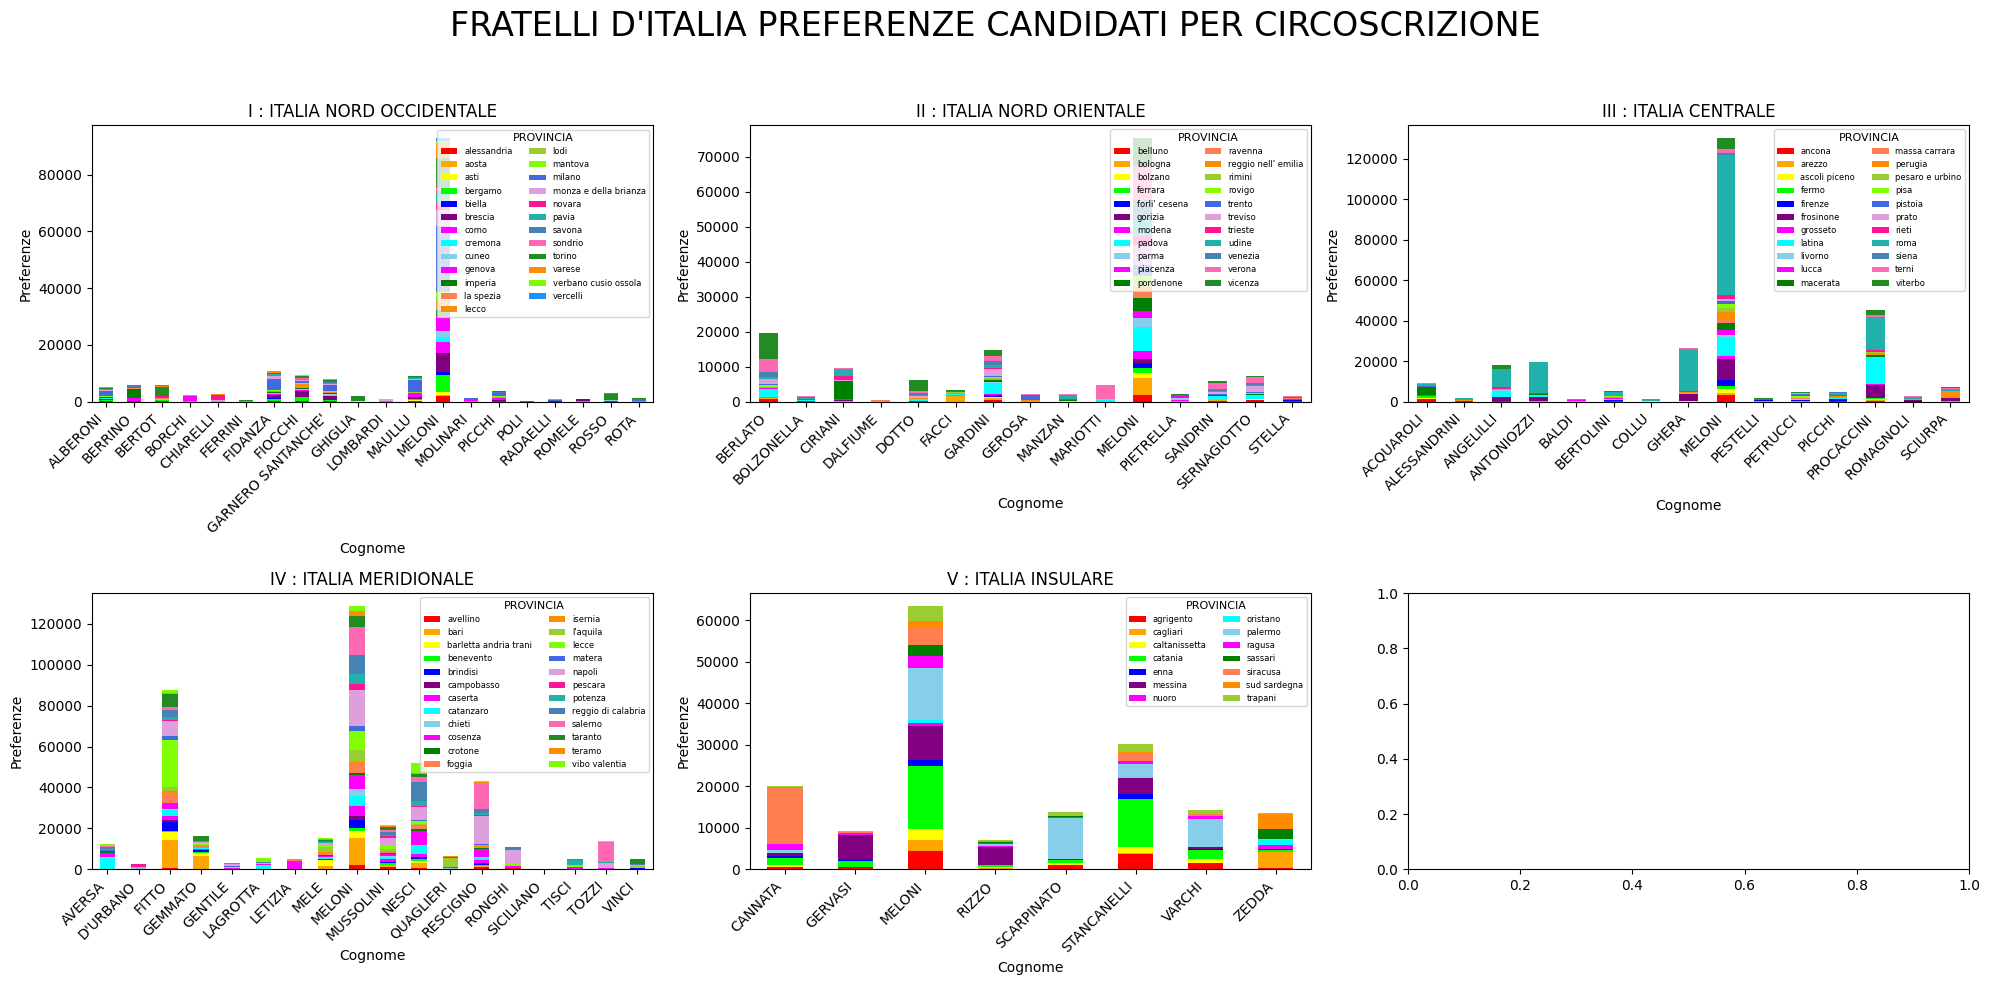

In [22]:
import matplotlib.pyplot as plt

partiti = ["LEGA SALVINI PREMIER", "PARTITO DEMOCRATICO", "FORZA ITALIA", "MOVIMENTO 5 STELLE", "FRATELLI D'ITALIA"]
circoscrizioni = ['i : italia nord occidentale', 'ii : italia nord orientale', 'iii : italia centrale', 'iv : italia meridionale', 'v : italia insulare']

# Iterazione su ogni partito
for i, partito in enumerate(partiti):
    PREFERENZE_LISTA = PREFERENZE[PREFERENZE['LISTA'] == partito]
    # Creazione della figura con subplot
    fig, axs = plt.subplots(2, 3, figsize=(20, 10))
    fig.suptitle(partito + " PREFERENZE CANDIDATI PER CIRCOSCRIZIONE", fontsize=24)
    # Dizionario per subplots
    D = {0: (0, 0), 1: (0, 1), 2: (0, 2), 3: (1, 0), 4: (1, 1)}

    # Iterazione su ogni circoscrizione
    for j, circoscrizione in enumerate(circoscrizioni):
        COLORS = ['red', 'orange', 'yellow', 'lime', 'blue', 'purple', 'magenta', 'cyan', 'skyblue', 'fuchsia', 'green', 'coral', 'darkorange', 'yellowgreen', 'chartreuse', 'royalblue', 'plum', 'deeppink', 'lightseagreen', 'steelblue', 'hotpink', 'forestgreen', 'darkorange', 'lawngreen', 'dodgerblue', 'tomato', 'lightsalmon', 'mediumseagreen', 'lightblue', 'orangered']
        PREFERENZE_LISTA_CIRCOSCRIZIONE = PREFERENZE_LISTA[PREFERENZE_LISTA['CIRCOSCRIZIONE'] == circoscrizione]
        # Aggregazione delle preferenze per cognome
        PREFERENZE_CANDIDATI_PROVINCIA_CIRCOSCRIZIONE = (PREFERENZE_LISTA_CIRCOSCRIZIONE.groupby(["PROVINCIA", "NOME", "COGNOME", "ELETTO", "EUROPARLAMENTARE"])
                 .agg(PREFERENZE_PROVINCIA=("PREFERENZE", "sum"))
                 .reset_index())
        
        # Ordinamento decrescente per preferenze
        PREFERENZE_CANDIDATI_PROVINCIA_CIRCOSCRIZIONE = PREFERENZE_CANDIDATI_PROVINCIA_CIRCOSCRIZIONE.sort_values(by='PREFERENZE_PROVINCIA', ascending=False)
        
        # Creazione del pivot table con ordine di cognome basato sulle preferenze
        PIVOT = PREFERENZE_CANDIDATI_PROVINCIA_CIRCOSCRIZIONE.pivot_table(index='COGNOME', columns='PROVINCIA', values='PREFERENZE_PROVINCIA', aggfunc='sum')
        
        # Plot ordinato
        ax = axs[D[j]]
        PIVOT.plot(kind='bar', stacked=True, color=COLORS[:PIVOT.shape[1]], ax=ax)
        
        # Aggiunta di etichette e titolo
        ax.set_xlabel('Cognome')
        ax.set_ylabel('Preferenze')
        ax.set_title(circoscrizione.upper())
        ax.set_xticklabels(PIVOT.index, rotation=45, ha='right')
        ax.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=2, fontsize=6, title="PROVINCIA", title_fontsize=8, markerscale=0.3)
    # Layout finale
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()



- *VISUALIZZAZIONE CON LA MAPPA*

c:\Users\al3ss\miniconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\al3ss\miniconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\al3ss\AppData\Local\Temp\ipykernel_12828\911029791.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

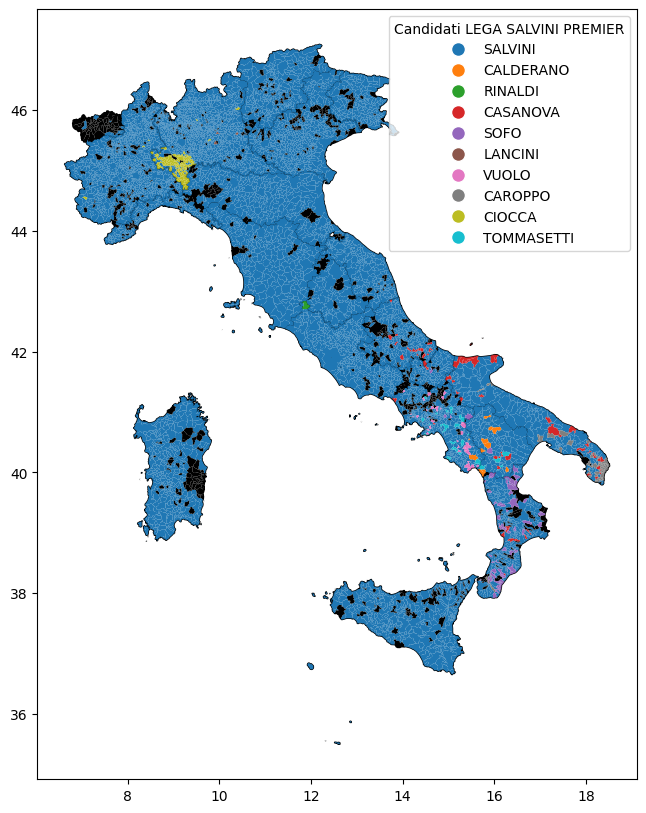

C:\Users\al3ss\AppData\Local\Temp\ipykernel_12828\911029791.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_voted_person_info['COMUNE'] = most_voted_person_info['COMUNE'].str.lower()


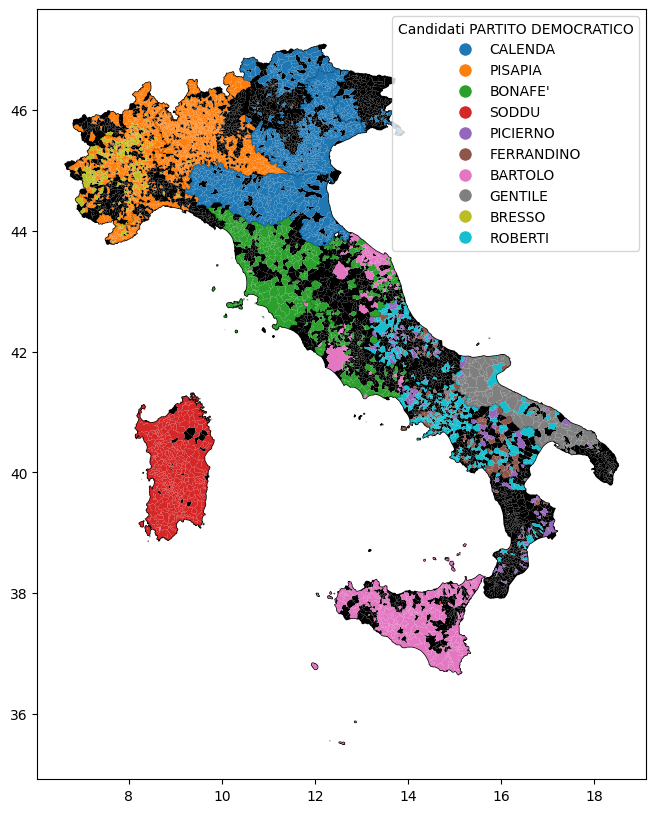

C:\Users\al3ss\AppData\Local\Temp\ipykernel_12828\911029791.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_voted_person_info['COMUNE'] = most_voted_person_info['COMUNE'].str.lower()


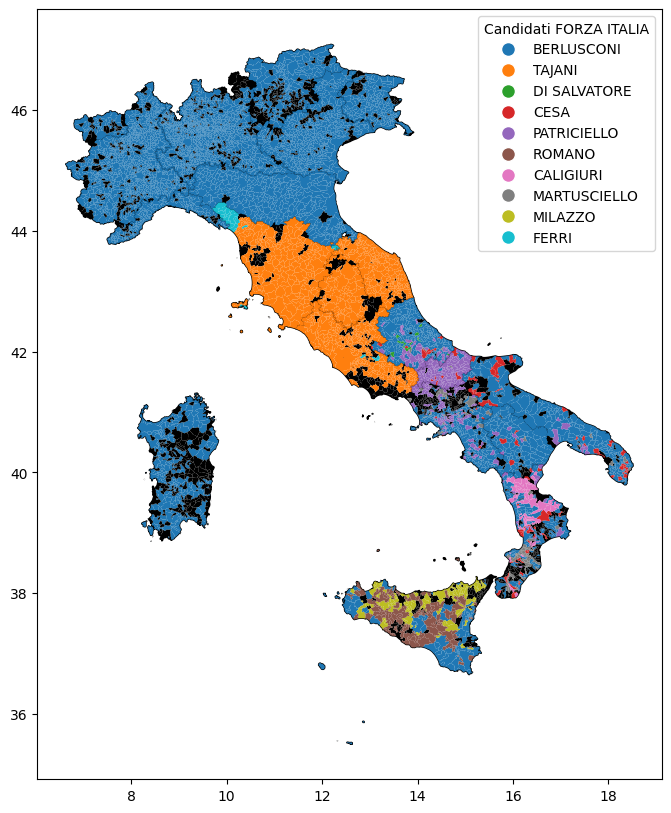

C:\Users\al3ss\AppData\Local\Temp\ipykernel_12828\911029791.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_voted_person_info['COMUNE'] = most_voted_person_info['COMUNE'].str.lower()


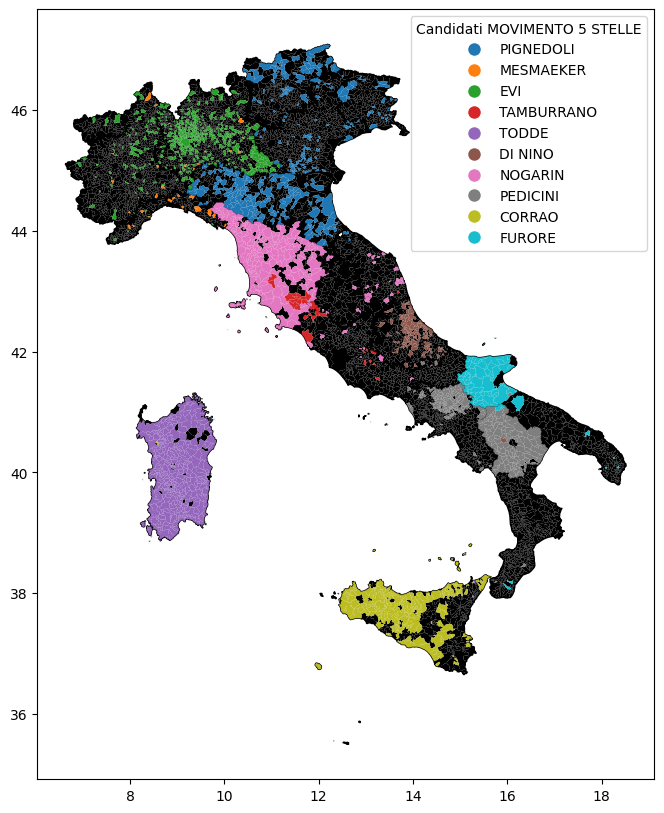

C:\Users\al3ss\AppData\Local\Temp\ipykernel_12828\911029791.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_voted_person_info['COMUNE'] = most_voted_person_info['COMUNE'].str.lower()


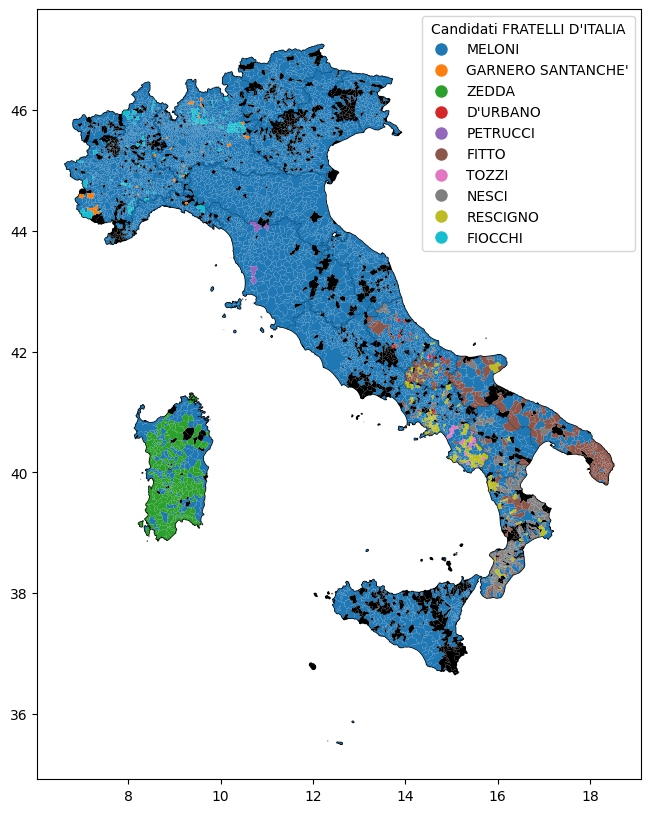

In [23]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

partiti = ["LEGA SALVINI PREMIER", "PARTITO DEMOCRATICO", "FORZA ITALIA", "MOVIMENTO 5 STELLE", "FRATELLI D'ITALIA"]

# 1. Carica i dati geografici
# Regioni
df_regions = gpd.read_file("C:/Users/al3ss/Desktop/europee_2019/data/Limiti01012019_g/Reg01012019_g/Reg01012019_g_WGS84.shp").to_crs({'init': 'epsg:4326'})
# Comuni
df_comuni = gpd.read_file("C:/Users/al3ss/Desktop/europee_2019/data/Limiti01012019_g/Com01012019_g/Com01012019_g_WGS84.shp").to_crs({'init': 'epsg:4326'})

for partito in partiti:
    # 2. Filtra per il partito di interesse
    preferenze_partito = PREFERENZE[PREFERENZE['LISTA'] == partito]
    '''
    if partito == "LEGA SALVINI PREMIER":
        preferenze_partito = preferenze_partito[PREFERENZE['COGNOME']!= "SALVINI"]
    if partito == "FRATELLI D'ITALIA":
        preferenze_partito = preferenze_partito[PREFERENZE['COGNOME']!= "MELONI"]
    '''
    # 3. Trova il candidato più votato in ogni comune
    most_voted_person = preferenze_partito.loc[preferenze_partito.groupby('COMUNE')['PREFERENZE'].idxmax()]

    # 4. Creare un DataFrame con le informazioni necessarie
    most_voted_person_info = most_voted_person [['COMUNE', 'NOME', 'COGNOME', 'PREFERENZE', 'ELETTO', 'EUROPARLAMENTARE']]

    # 5. Unisci i dati geografici con i comuni
    df_comuni['COMUNE'] = df_comuni['COMUNE'].str.lower()
    most_voted_person_info['COMUNE'] = most_voted_person_info['COMUNE'].str.lower()

    merged = df_comuni.set_index('COMUNE').join(most_voted_person_info.set_index('COMUNE'))

    # 6. Definisci i colori per ciascun candidato
    candidates_colors = {cognome: color for cognome, color in zip(most_voted_person_info['COGNOME'].unique(), mcolors.TABLEAU_COLORS)}

    # Funzione per assegnare il colore
    def assign_color(row):
        
        if row['COGNOME'] in candidates_colors:
            return candidates_colors[row['COGNOME']] # Colore in base al nome del candidato eletto
        else:
            return 'black'  # Nero per i non eletti

    # Aggiungi la colonna 'COLOR' con il colore appropriato
    merged['COLOR'] = merged.apply(assign_color, axis=1)

    # 7. Visualizzazione della mappa
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot della mappa delle regioni italiane
    df_regions.plot(ax=ax, edgecolor='black', color='none')

    # Plot dei comuni con marker proporzionali ai voti ricevuti e colorati
    for color in merged['COLOR'].unique():
        subset = merged[merged['COLOR'] == color]
        subset.plot(ax=ax, marker='o', color=color, 
                    markersize=subset['PREFERENZE'] / 100, 
                    label=color)

    # Aggiungi una legenda
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=name)
            for name, color in candidates_colors.items()]
    plt.legend(title="Candidati"+ " " + partito, handles=handles)

    # Mostra la mappa
    plt.show()

- *RAPPRESENTAZIONE CON I GRAFI*

C:\Users\al3ss\AppData\Local\Temp\ipykernel_12828\3611198333.py:61: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', len(circoscrizioni))


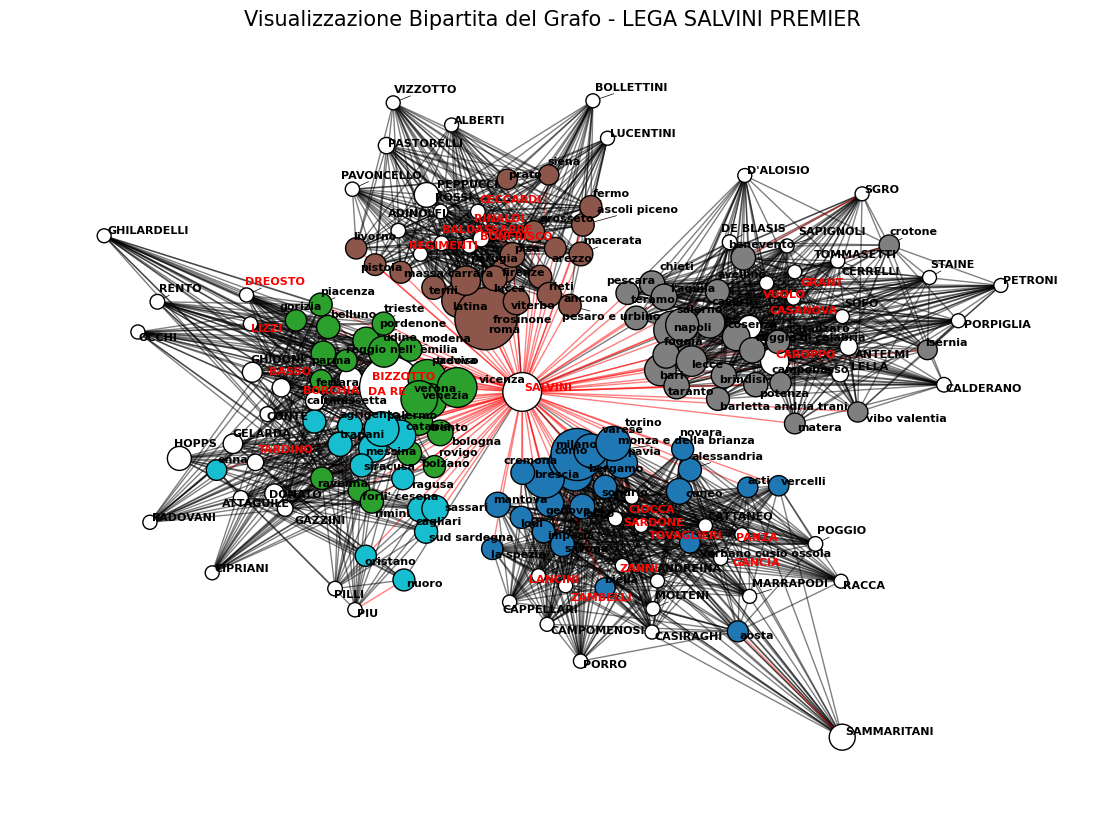

In [24]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text
import matplotlib.cm as cm
import matplotlib.colors as mcolors

partito = "LEGA SALVINI PREMIER"

# Filtrare e aggregare i dati
CANDIDATI = PREFERENZE[PREFERENZE['LISTA'] == partito]
CANDIDATI = CANDIDATI[CANDIDATI['PREFERENZE'] != 0]

CANDIDATIP = (CANDIDATI.groupby(["CIRCOSCRIZIONE", "REGIONE", "PROVINCIA", "NOME", "COGNOME", "LUOGONASCITA", "ELETTO", "EUROPARLAMENTARE"])
                 .agg(PREFERENZE_PROVINCIA=("PREFERENZE", "sum"))
                 .reset_index())

# Creare il grafo bipartito
B = nx.Graph()

# Aggiungere i nodi per i candidati e le province
candidati = list(CANDIDATIP['COGNOME'])
province = list(CANDIDATIP['PROVINCIA'])

B.add_nodes_from(candidati, bipartite=0)  # Nodo set 0
B.add_nodes_from(province, bipartite=1)  # Nodo set 1

# Trova il candidato con il maggior numero di voti in ciascuna provincia
max_votes_per_provincia = CANDIDATIP.loc[CANDIDATIP.groupby('PROVINCIA')['PREFERENZE_PROVINCIA'].idxmax()]

# Aggiungere archi tra candidati e province
for _, row in CANDIDATIP.iterrows():
    edge_color = 'red' if row['COGNOME'] == max_votes_per_provincia.loc[max_votes_per_provincia['PROVINCIA'] == row['PROVINCIA'], 'COGNOME'].values[0] else 'black'
    B.add_edge(row['COGNOME'], row['PROVINCIA'], weight=row['PREFERENZE_PROVINCIA'], color=edge_color)

# Normalizzare le dimensioni dei nodi per i candidati
pref_values = list(CANDIDATIP['PREFERENZE_PROVINCIA'])
min_size = 100
max_size = 10000
normalized_sizes = np.interp(pref_values, (min(pref_values), max(pref_values)), (min_size, max_size))
node_sizes = dict(zip(CANDIDATIP['COGNOME'], normalized_sizes))

# Impostare la dimensione normalizzata come attributo dei nodi
nx.set_node_attributes(B, node_sizes, 'size')

# Calcolare la dimensione dei nodi per le province in base alle preferenze totali
province_sizes = (CANDIDATI.groupby("PROVINCIA")["PREFERENZE"].sum().reset_index())
province_sizes = dict(zip(province_sizes['PROVINCIA'], province_sizes['PREFERENZE']))

# Normalizzare le dimensioni delle province
min_size_prov = 200
max_size_prov = 2000
normalized_province_sizes = np.interp(list(province_sizes.values()), (min(province_sizes.values()), max(province_sizes.values())), (min_size_prov, max_size_prov))
province_node_sizes = dict(zip(province_sizes.keys(), normalized_province_sizes))

# Impostare le dimensioni normalizzate come attributo dei nodi provincia
nx.set_node_attributes(B, province_node_sizes, 'size')

# Associare un colore alle circoscrizioni
circoscrizioni = CANDIDATIP['CIRCOSCRIZIONE'].unique()
colors = cm.get_cmap('tab10', len(circoscrizioni))
circoscrizione_colors = {circ: mcolors.rgb2hex(colors(i)[:3]) for i, circ in enumerate(circoscrizioni)}

# Imposta i colori dei nodi
node_colors = []
for node in B.nodes():
    if node in candidati:
        if any(CANDIDATIP[CANDIDATIP['COGNOME'] == node]['ELETTO'] == 'S'):
            node_colors.append("white")  # Colore di sfondo
        else:
            node_colors.append("white")  # Colore di sfondo
    else:
        # Colora la provincia in base alla circoscrizione
        circoscrizione = CANDIDATIP[CANDIDATIP['PROVINCIA'] == node]['CIRCOSCRIZIONE'].values[0]
        node_colors.append(circoscrizione_colors[circoscrizione])

# Applicare l'algoritmo Fruchterman-Reingold (spring_layout) con maggiore repulsione tra i nodi
pos = nx.spring_layout(B, seed=42, k=0.5, iterations=100)

# Disegna il grafo
plt.figure(figsize=(14, 10))

# Disegnare i nodi
nx.draw_networkx_nodes(B, pos, node_size=[B.nodes[node]['size'] for node in B.nodes()],
                       node_color=node_colors, edgecolors='black')

# Disegnare gli archi con alpha per trasparenza
edge_colors = [B[u][v]['color'] for u, v in B.edges()]
nx.draw_networkx_edges(B, pos, edge_color=edge_colors, alpha=0.5)

# Disegnare le etichette
texts = []
for node, (x, y) in pos.items():
    if node in candidati:
        color = 'red' if any(CANDIDATIP[CANDIDATIP['COGNOME'] == node]['ELETTO'] == 'E') else 'black'
    else:
        color = 'black'
    
    texts.append(plt.text(x, y, s=node, fontsize=8, fontweight='bold', color=color))

# Adjust text to minimize overlap
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='black', lw=0.5))

# Titolo del grafo
plt.title(f"Visualizzazione Bipartita del Grafo - {partito}", size=15)

# Rimuovere gli assi
plt.axis('off')

# Visualizzare il grafico
plt.show()




*PROABILITA' DI ESSERE CANDIDATI E PROABILITA DI ESSERE ELETTI SE NATI NELLA CIRCOSCRIZIONE DOVE SI E' CANDIDATI*


In [25]:
COMUNI = PREFERENZE[['CIRCOSCRIZIONE','COMUNE']].drop_duplicates()
CANDIDATI = PREFERENZE[['CIRCOSCRIZIONE','LISTA','COGNOME','NOME','LUOGONASCITA','ELETTO']].drop_duplicates()
circoscrizioni = ['i : italia nord occidentale', 'ii : italia nord orientale', 'iii : italia centrale', 'iv : italia meridionale', 'v : italia insulare']
COMUNI_I = COMUNI[COMUNI['CIRCOSCRIZIONE'] == circoscrizioni[0]]
COMUNI_II = COMUNI[COMUNI['CIRCOSCRIZIONE'] == circoscrizioni[1]]
COMUNI_III = COMUNI[COMUNI['CIRCOSCRIZIONE'] == circoscrizioni[2]]
COMUNI_IV = COMUNI[COMUNI['CIRCOSCRIZIONE'] == circoscrizioni[3]]
COMUNI_V = COMUNI[COMUNI['CIRCOSCRIZIONE'] == circoscrizioni[4]]
COMUNI_CIRCOSCRIZIONI = [list(COMUNI_I['COMUNE']), list(COMUNI_II['COMUNE']), list(COMUNI_III['COMUNE']),list(COMUNI_IV['COMUNE']), list(COMUNI_V['COMUNE'])]


In [26]:
N_CANDIDATI = CANDIDATI.shape[0]
P_NATO_DOVE_CANDIDATO= [0, 0, 0, 0, 0]
L_N_NATI_DOVE_CANDIDATI= [0, 0, 0, 0, 0]
L_N_CANDIDATI_CIRCOSCRIZIONE = [0, 0, 0, 0, 0]
for i, circoscrizione in enumerate(circoscrizioni):
    CANDIDATI_CIRCOSCRIZIONE = CANDIDATI[CANDIDATI['CIRCOSCRIZIONE'] == circoscrizione]
    L_N_CANDIDATI_CIRCOSCRIZIONE[i] = CANDIDATI_CIRCOSCRIZIONE.shape[0]
    NATI_DOVE_CANDIDATI = CANDIDATI_CIRCOSCRIZIONE[CANDIDATI_CIRCOSCRIZIONE['LUOGONASCITA'].isin(COMUNI_CIRCOSCRIZIONI[i])]
    L_N_NATI_DOVE_CANDIDATI[i] = NATI_DOVE_CANDIDATI.shape[0]
    P_NATO_DOVE_CANDIDATO[i ]= L_N_NATI_DOVE_CANDIDATI[i]/L_N_CANDIDATI_CIRCOSCRIZIONE[i]
N_NATI_DOVE_CANDIDATI = sum(L_N_NATI_DOVE_CANDIDATI)

P = N_NATI_DOVE_CANDIDATI/N_CANDIDATI
P = round(P,2)
P_NATO_DOVE_CANDIDATO = [round(num, 2) for num in P_NATO_DOVE_CANDIDATO]
print(P)
print(P_NATO_DOVE_CANDIDATO)
print(L_N_NATI_DOVE_CANDIDATI)
print(L_N_CANDIDATI_CIRCOSCRIZIONE)


0.7
[0.68, 0.63, 0.69, 0.79, 0.68]
[189, 138, 148, 197, 80]
[276, 220, 214, 248, 118]


In [27]:
VOTI_CANDIDATI = PREFERENZE[['CIRCOSCRIZIONE','COMUNE','LISTA','COGNOME','NOME','LUOGONASCITA','ELETTO','PREFERENZE']].drop_duplicates()
N_PREFERENZE = VOTI_CANDIDATI['PREFERENZE'].sum()
P_PREFERITO_DOVE_NATO= [0, 0, 0, 0, 0]
L_N_PREFERITI_DOVE_NATI= [0, 0, 0, 0, 0]
L_N_PREFERENZE = [0, 0, 0, 0, 0]
for i, circoscrizione in enumerate(circoscrizioni):
    VOTI_CANDIDATI_CIRCOSCRIZIONE = VOTI_CANDIDATI[VOTI_CANDIDATI['CIRCOSCRIZIONE'] == circoscrizione]
    L_N_PREFERENZE[i] = VOTI_CANDIDATI_CIRCOSCRIZIONE['PREFERENZE'].sum()
    VOTI_NATI_DOVE_CANDIDATI = VOTI_CANDIDATI_CIRCOSCRIZIONE[VOTI_CANDIDATI_CIRCOSCRIZIONE['LUOGONASCITA'].isin(COMUNI_CIRCOSCRIZIONI[i])]
    L_N_PREFERITI_DOVE_NATI[i] = VOTI_NATI_DOVE_CANDIDATI['PREFERENZE'].sum()
    P_PREFERITO_DOVE_NATO[i]= L_N_PREFERITI_DOVE_NATI[i]/L_N_PREFERENZE[i]

N_PREFERITI_DOVE_NATI= sum(L_N_PREFERITI_DOVE_NATI)
P_PREFERITO_DOVE_NATO = [round(num, 2) for num in P_PREFERITO_DOVE_NATO]
P = N_PREFERITI_DOVE_NATI/N_PREFERENZE
P = round(P,2)
print(P)
print(P_PREFERITO_DOVE_NATO)
print(L_N_PREFERITI_DOVE_NATI)
print(L_N_PREFERENZE)

0.68
[0.88, 0.46, 0.57, 0.72, 0.7]
[2366649, 1111951, 1453136, 2509619, 1367955]
[2678652, 2400039, 2538376, 3466253, 1948169]


In [28]:
partiti = ["LEGA SALVINI PREMIER", "PARTITO DEMOCRATICO", "FORZA ITALIA", "MOVIMENTO 5 STELLE", "FRATELLI D'ITALIA"]
print(circoscrizioni)
for partito in partiti:
    CANDIDATI_PARTITO = CANDIDATI[CANDIDATI['LISTA'] == partito]
    N_CANDIDATI = CANDIDATI_PARTITO.shape[0]
    P_NATO_DOVE_CANDIDATO= [0, 0, 0, 0, 0]
    L_N_NATI_DOVE_CANDIDATI= [0, 0, 0, 0, 0]
    L_N_CANDIDATI_CIRCOSCRIZIONE = [0, 0, 0, 0, 0]
    for i, circoscrizione in enumerate(circoscrizioni):
        CANDIDATI_CIRCOSCRIZIONE = CANDIDATI_PARTITO[CANDIDATI_PARTITO['CIRCOSCRIZIONE'] == circoscrizione]
        L_N_CANDIDATI_CIRCOSCRIZIONE[i] = CANDIDATI_CIRCOSCRIZIONE.shape[0]
        NATI_DOVE_CANDIDATI = CANDIDATI_CIRCOSCRIZIONE[CANDIDATI_CIRCOSCRIZIONE['LUOGONASCITA'].isin(COMUNI_CIRCOSCRIZIONI[i])]
        L_N_NATI_DOVE_CANDIDATI[i] = NATI_DOVE_CANDIDATI.shape[0]
        if L_N_CANDIDATI_CIRCOSCRIZIONE[i] > 0:
            P_NATO_DOVE_CANDIDATO[i] = L_N_NATI_DOVE_CANDIDATI[i] / L_N_CANDIDATI_CIRCOSCRIZIONE[i]
        else:
            P_NATO_DOVE_CANDIDATO[i] = 0

    N_NATI_DOVE_CANDIDATI = sum(L_N_NATI_DOVE_CANDIDATI)
    P = N_NATI_DOVE_CANDIDATI/N_CANDIDATI
    P = round(P,2)
    P_NATO_DOVE_CANDIDATO = [round(num, 2) for num in P_NATO_DOVE_CANDIDATO]
    print(partito)
    print(P)
    print(P_NATO_DOVE_CANDIDATO)
    print(L_N_NATI_DOVE_CANDIDATI)
    print(L_N_CANDIDATI_CIRCOSCRIZIONE)

['i : italia nord occidentale', 'ii : italia nord orientale', 'iii : italia centrale', 'iv : italia meridionale', 'v : italia insulare']
LEGA SALVINI PREMIER
0.82
[0.95, 0.87, 0.73, 0.72, 0.75]
[19, 13, 11, 13, 6]
[20, 15, 15, 18, 8]
PARTITO DEMOCRATICO
0.78
[0.8, 0.6, 0.73, 0.89, 0.88]
[16, 9, 11, 16, 7]
[20, 15, 15, 18, 8]
FORZA ITALIA
0.78
[0.75, 0.67, 0.8, 0.83, 0.88]
[15, 10, 12, 15, 7]
[20, 15, 15, 18, 8]
MOVIMENTO 5 STELLE
0.86
[0.85, 0.73, 0.8, 1.0, 0.88]
[17, 11, 12, 18, 7]
[20, 15, 15, 18, 8]
FRATELLI D'ITALIA
0.78
[0.75, 0.8, 0.73, 0.83, 0.75]
[15, 12, 11, 15, 6]
[20, 15, 15, 18, 8]


In [29]:
partiti = ["LEGA SALVINI PREMIER", "PARTITO DEMOCRATICO", "FORZA ITALIA", "MOVIMENTO 5 STELLE", "FRATELLI D'ITALIA"]
print(circoscrizioni)
for partito in partiti:
    VOTI_CANDIDATI = PREFERENZE[['CIRCOSCRIZIONE','COMUNE','LISTA','COGNOME','NOME','LUOGONASCITA','ELETTO','PREFERENZE']].drop_duplicates()
    VOTI_CANDIDATI = VOTI_CANDIDATI[VOTI_CANDIDATI['LISTA'] == partito]
    N_PREFERENZE = VOTI_CANDIDATI['PREFERENZE'].sum()
    P_PREFERITO_DOVE_NATO= [0, 0, 0, 0, 0]
    L_N_PREFERITI_DOVE_NATI= [0, 0, 0, 0, 0]
    L_N_PREFERENZE = [0, 0, 0, 0, 0]
    for i, circoscrizione in enumerate(circoscrizioni):
        VOTI_CANDIDATI_CIRCOSCRIZIONE = VOTI_CANDIDATI[VOTI_CANDIDATI['CIRCOSCRIZIONE'] == circoscrizione]
        L_N_PREFERENZE[i] = VOTI_CANDIDATI_CIRCOSCRIZIONE['PREFERENZE'].sum()
        VOTI_NATI_DOVE_CANDIDATI = VOTI_CANDIDATI_CIRCOSCRIZIONE[VOTI_CANDIDATI_CIRCOSCRIZIONE['LUOGONASCITA'].isin(COMUNI_CIRCOSCRIZIONI[i])]
        L_N_PREFERITI_DOVE_NATI[i] = VOTI_NATI_DOVE_CANDIDATI['PREFERENZE'].sum()
        P_PREFERITO_DOVE_NATO[i]= L_N_PREFERITI_DOVE_NATI[i]/L_N_PREFERENZE[i]

    N_PREFERITI_DOVE_NATI= sum(L_N_PREFERITI_DOVE_NATI)
    P_PREFERITO_DOVE_NATO = [round(num, 2) for num in P_PREFERITO_DOVE_NATO]
    P = N_PREFERITI_DOVE_NATI/N_PREFERENZE
    P = round(P,2)
    print(partito)
    print(P)
    print(P_PREFERITO_DOVE_NATO)
    print(L_N_PREFERITI_DOVE_NATI)
    print(L_N_PREFERENZE)
    

['i : italia nord occidentale', 'ii : italia nord orientale', 'iii : italia centrale', 'iv : italia meridionale', 'v : italia insulare']
LEGA SALVINI PREMIER
0.51
[0.99, 0.34, 0.3, 0.35, 0.35]
[1078299, 305554, 261324, 269330, 145946]
[1085449, 894812, 859847, 767716, 413095]
PARTITO DEMOCRATICO
0.74
[0.85, 0.45, 0.59, 0.96, 0.97]
[702131, 365125, 479052, 792189, 398463]
[824538, 812814, 817133, 822544, 411986]
FORZA ITALIA
0.7
[0.97, 0.26, 0.94, 0.56, 0.76]
[305526, 38843, 142480, 320126, 279313]
[316563, 147470, 151418, 566750, 369612]
MOVIMENTO 5 STELLE
0.89
[0.83, 0.88, 0.92, 1.0, 0.76]
[86811, 72761, 185295, 564209, 364598]
[104175, 82429, 201874, 564209, 479975]
FRATELLI D'ITALIA
0.63
[0.34, 0.47, 0.89, 0.64, 0.59]
[56732, 72914, 247720, 281109, 101416]
[166810, 156350, 278656, 436002, 171952]


*PREFERENZE2014*


In [30]:
PREFERENZE2014 = pd.read_csv("C:/Users/al3ss/Desktop/europee_2019/data/2014/preferences2014.csv")
print(PREFERENZE2014.columns)

# Removing the first column
PREFERENZE2014 = PREFERENZE2014.iloc[:, 2:]

# Changing column names
old_names = ['circoscrizione', 'regione', 'provincia', 'comune','descrlista', 'votilista', 'cognome', 'nome', 'datanascita','luogonascita', 'sesso', 'PREFERENZE', 'CODTIPOELETTO']
new_names = ["CIRCOSCRIZIONE", "REGIONE", "PROVINCIA", "COMUNE", "LISTA", "VOTILISTA", "COGNOME", "NOME", "DATANASCITA", "LUOGONASCITA", "SESSO", "PREFERENZE", "ELETTO"]
PREFERENZE2014.columns = new_names

#PROBLEMA LOGONASCITA
PREFERENZE2014['LUOGONASCITA'] = PREFERENZE2014['LUOGONASCITA'].str.replace(r'\s*\(.*\)', '', regex=True)

# Converting PREFERENZE and VOTILISTA to numeric
PREFERENZE2014["VOTILISTA"] = pd.to_numeric(PREFERENZE2014["VOTILISTA"], errors='coerce')
PREFERENZE2014["PREFERENZE"] = pd.to_numeric(PREFERENZE2014["PREFERENZE"], errors='coerce')
PREFERENZE2014.head()

Index(['anno', 'non lo so', 'circoscrizione', 'regione', 'provincia', 'comune',
       'descrlista', 'votilista', 'cognome', 'nome', 'datanascita',
       'luogonascita', 'sesso', 'PREFERENZE', 'CODTIPOELETTO'],
      dtype='object')


CIRCOSCRIZIONE    REGIONE PROVINCIA   COMUNE  \
0  I : ITALIA NORD-OCCIDENTALE  LOMBARDIA   CREMONA  VOLTIDO   
1  I : ITALIA NORD-OCCIDENTALE  LOMBARDIA   CREMONA  VOLTIDO   
2  I : ITALIA NORD-OCCIDENTALE  LOMBARDIA   CREMONA  VOLTIDO   
3  I : ITALIA NORD-OCCIDENTALE  LOMBARDIA   CREMONA  VOLTIDO   
4  I : ITALIA NORD-OCCIDENTALE  LOMBARDIA   CREMONA  VOLTIDO   

                 LISTA  VOTILISTA   COGNOME       NOME         DATANASCITA  \
0  PARTITO DEMOCRATICO         87   MORGANO      LUIGI  15/3/1951 00:00:00   
1  PARTITO DEMOCRATICO         87    BRESSO   MERCEDES  12/7/1944 00:00:00   
2  PARTITO DEMOCRATICO         87   TRAPANI  ANTONELLA   2/7/1976 00:00:00   
3  PARTITO DEMOCRATICO         87    VIOTTI    DANIELE   8/3/1974 00:00:00   
4  PARTITO DEMOCRATICO         87  LOMBARDI     MARINA   4/6/1964 00:00:00   

  LUOGONASCITA SESSO  PREFERENZE ELETTO  
0      BRESCIA     M           0      E  
1      SANREMO     F           0      E  
2  DOMODOSSOLA     F           0      N  
3  ALESSANDRIA     M           0      E  
4       VARESE     F           1      N

In [31]:
#VOTI TOTALI
A =PREFERENZE2014[['CIRCOSCRIZIONE', 'COMUNE','LISTA','VOTILISTA']].drop_duplicates()
print("VOTI TOTALI:\t    "+str(sum(A['VOTILISTA'])))

# CANDIDATES: Keep only 'NOME', 'COGNOME', 'LUOGONASCITA'
CANDIDATI2014 = PREFERENZE2014[["COGNOME", "NOME", "LUOGONASCITA"]].drop_duplicates()
print("CANDIDATI TOTALI:\t " + str((CANDIDATI2014.shape)[0]))  # Should print (940, 3)

# COMMUNI: Keep only "PROVINCIA", "COMUNE"
COMUNI2014 = PREFERENZE2014[["PROVINCIA", "COMUNE"]].drop_duplicates()
print("COMUNI TOTALI: \t\t" + str(((COMUNI2014.shape)[0])))  # Should print (7915, 2)
print()
# N preferenze
N = PREFERENZE2014['PREFERENZE'].sum()
print("PREFERENZE TOTALI:  " + str(N) + ", DI CUI:")
# PREFERENZE PER CIRCOSCRIZIONE
PREFERENZE_CIRCOSCRIZIONE = (PREFERENZE2014.groupby(["CIRCOSCRIZIONE"])
                  .agg(PREFERENZE_CIRCOSCRIZIONE=("PREFERENZE", "sum"))
                  .reset_index())
N_PREFERENZE_ITALIA_NORD_OCCIDENTALE = PREFERENZE_CIRCOSCRIZIONE.iloc[0, 1]
P1= round(((N_PREFERENZE_ITALIA_NORD_OCCIDENTALE/ N) * 100),2)
N_PREFERENZE_ITALIA_NORD_ORIENTALE= PREFERENZE_CIRCOSCRIZIONE.iloc[1, 1]
P2= round(((N_PREFERENZE_ITALIA_NORD_ORIENTALE/ N) * 100),2)
N_PREFERENZE_ITALIA_CENTRALE = PREFERENZE_CIRCOSCRIZIONE.iloc[2, 1]
P3= round(((N_PREFERENZE_ITALIA_CENTRALE/ N) * 100),2)
N_PREFERENZE_ITALIA_MERIDIONALE = PREFERENZE_CIRCOSCRIZIONE.iloc[3, 1]
P4= round(((N_PREFERENZE_ITALIA_MERIDIONALE/ N) * 100),2)
N_PREFERENZE_ITALIA_INSULARE = PREFERENZE_CIRCOSCRIZIONE.iloc[4, 1]
P5= round(((N_PREFERENZE_ITALIA_INSULARE/ N) * 100),2)
print("I\tPREFERENZE ITALIA NORD OCCIDENTALE:\t" + str(N_PREFERENZE_ITALIA_NORD_OCCIDENTALE) + "\t(" + str(P1) + "%)")
print("II\tPREFERENZE ITALIA NORD ORIENTALE:\t" + str(N_PREFERENZE_ITALIA_NORD_ORIENTALE) + "\t(" + str(P2) + "%)")
print("III\tPREFERENZE ITALIA CENTRALE:\t\t" + str(N_PREFERENZE_ITALIA_CENTRALE) + "\t(" + str(P3) + "%)")
print("IV\tPREFERENZE ITALIA MERIDIONALE:\t\t" + str(N_PREFERENZE_ITALIA_MERIDIONALE) + "\t(" + str(P4) + "0%)")
print("V\tPREFERENZE ITALIA INSULARE:\t\t" + str(N_PREFERENZE_ITALIA_INSULARE)+ "\t(" + str(P5) + "%)")

PREFERENZE_PARTITI = (PREFERENZE2014.groupby(["LISTA"])
                  .agg(PREFERENZE_PARTITI =("PREFERENZE", "sum"))
                  .reset_index())
PREFERENZE_PARTITI = PREFERENZE_PARTITI.sort_values(by="PREFERENZE_PARTITI", ascending=False)

print()
print("DI QUESTE PREFERENZE:")

altri = N
for i, partito in enumerate(PREFERENZE_PARTITI["LISTA"]):
    if i == 7:
        perc = "\t(" + str(round(altri/N * 100,2)) + "%)"
        print("-\t"+ "ALTRI < 3%:  " + "\t\t\t\t" + str(altri) + perc)
        break
    pref = PREFERENZE_PARTITI.iloc[i, 1]
    altri -=  PREFERENZE_PARTITI.iloc[i, 1]
    fract = (PREFERENZE_PARTITI.iloc[i, 1]/N)* 100
    perc = str()
    if partito == "FRATELLI D'ITALIA":  perc = "\t( " + str(round(fract,2)) + "%)" 
    else: perc = "\t(" + str(round(fract,2)) + "%)"
    tab = "\t\t\t"
    if partito == "LEGA NORD-DIE FREIHEITLICHEN-BASTA EURO" :tab= " "
    if partito == "MOVIMENTO 5 STELLE BEPPEGRILLO.IT" :tab= "\t"
    if partito == "FORZA ITALIA" :tab= "\t\t\t\t"
    if partito == "NUOVO CENTRO DESTRA - UDC" :tab= "\t\t "
    if partito == "L'ALTRA EUROPA CON TSIPRAS" :tab= "\t\t "
    if partito == "FRATELLI D'ITALIA - ALLEANZA NAZIONALE" :tab= "  "

    print("-\t"+ partito + ":" + tab + str(pref) + perc)

VOTI TOTALI:	    27371747
CANDIDATI TOTALI:	 753
COMUNI TOTALI: 		8057

PREFERENZE TOTALI:  12722612, DI CUI:
I	PREFERENZE ITALIA NORD OCCIDENTALE:	2454004	(19.29%)
II	PREFERENZE ITALIA NORD ORIENTALE:	2042736	(16.06%)
III	PREFERENZE ITALIA CENTRALE:		2483825	(19.52%)
IV	PREFERENZE ITALIA MERIDIONALE:		3943957	(31.00%)
V	PREFERENZE ITALIA INSULARE:		1798090	(14.13%)

DI QUESTE PREFERENZE:
-	PARTITO DEMOCRATICO:			5222681	(41.05%)
-	FORZA ITALIA:				2240904	(17.61%)
-	MOVIMENTO 5 STELLE BEPPEGRILLO.IT:	1625054	(12.77%)
-	NUOVO CENTRO DESTRA - UDC:		 960593	(7.55%)
-	LEGA NORD-DIE FREIHEITLICHEN-BASTA EURO: 828171	(6.51%)
-	L'ALTRA EUROPA CON TSIPRAS:		 788046	(6.19%)
-	FRATELLI D'ITALIA - ALLEANZA NAZIONALE:  716057	(5.63%)
-	ALTRI < 3%:  				341106	(2.68%)


In [32]:
COMUNI = PREFERENZE2014[['CIRCOSCRIZIONE','COMUNE']].drop_duplicates()
CANDIDATI = PREFERENZE2014[['CIRCOSCRIZIONE','LISTA','COGNOME','NOME','LUOGONASCITA','ELETTO']].drop_duplicates()
circoscrizioni = ['I : ITALIA NORD-OCCIDENTALE', 'II : ITALIA NORD-ORIENTALE', 'III : ITALIA CENTRALE', 'IV : ITALIA MERIDIONALE', 'V : ITALIA INSULARE']
COMUNI_I = COMUNI[COMUNI['CIRCOSCRIZIONE'] == circoscrizioni[0]]
COMUNI_II = COMUNI[COMUNI['CIRCOSCRIZIONE'] == circoscrizioni[1]]
COMUNI_III = COMUNI[COMUNI['CIRCOSCRIZIONE'] == circoscrizioni[2]]
COMUNI_IV = COMUNI[COMUNI['CIRCOSCRIZIONE'] == circoscrizioni[3]]
COMUNI_V = COMUNI[COMUNI['CIRCOSCRIZIONE'] == circoscrizioni[4]]
COMUNI_CIRCOSCRIZIONI = [list(COMUNI_I['COMUNE']), list(COMUNI_II['COMUNE']), list(COMUNI_III['COMUNE']),list(COMUNI_IV['COMUNE']), list(COMUNI_V['COMUNE'])]


In [33]:
N_CANDIDATI = CANDIDATI.shape[0]
P_NATO_DOVE_CANDIDATO= [0, 0, 0, 0, 0]
L_N_NATI_DOVE_CANDIDATI= [0, 0, 0, 0, 0]
L_N_CANDIDATI_CIRCOSCRIZIONE = [0, 0, 0, 0, 0]
for i, circoscrizione in enumerate(circoscrizioni):
    CANDIDATI_CIRCOSCRIZIONE = CANDIDATI[CANDIDATI['CIRCOSCRIZIONE'] == circoscrizione]
    L_N_CANDIDATI_CIRCOSCRIZIONE[i] = CANDIDATI_CIRCOSCRIZIONE.shape[0]
    NATI_DOVE_CANDIDATI = CANDIDATI_CIRCOSCRIZIONE[CANDIDATI_CIRCOSCRIZIONE['LUOGONASCITA'].isin(COMUNI_CIRCOSCRIZIONI[i])]
    L_N_NATI_DOVE_CANDIDATI[i] = NATI_DOVE_CANDIDATI.shape[0]
    P_NATO_DOVE_CANDIDATO[i] = L_N_NATI_DOVE_CANDIDATI[i] / L_N_CANDIDATI_CIRCOSCRIZIONE[i]

N_NATI_DOVE_CANDIDATI = sum(L_N_NATI_DOVE_CANDIDATI)

P = N_NATI_DOVE_CANDIDATI/N_CANDIDATI
P = round(P,2)
P_NATO_DOVE_CANDIDATO = [round(num, 2) for num in P_NATO_DOVE_CANDIDATO]
print(P)
print(P_NATO_DOVE_CANDIDATO)
print(L_N_NATI_DOVE_CANDIDATI)
print(L_N_CANDIDATI_CIRCOSCRIZIONE)


0.73
[0.74, 0.7, 0.75, 0.74, 0.72]
[162, 114, 115, 137, 63]
[220, 162, 154, 186, 88]


In [34]:
VOTI_CANDIDATI = PREFERENZE2014[['CIRCOSCRIZIONE','COMUNE','LISTA','COGNOME','NOME','LUOGONASCITA','ELETTO','PREFERENZE']].drop_duplicates()
N_PREFERENZE = VOTI_CANDIDATI['PREFERENZE'].sum()
P_PREFERITO_DOVE_NATO= [0, 0, 0, 0, 0]
L_N_PREFERITI_DOVE_NATI= [0, 0, 0, 0, 0]
L_N_PREFERENZE = [0, 0, 0, 0, 0]
for i, circoscrizione in enumerate(circoscrizioni):
    VOTI_CANDIDATI_CIRCOSCRIZIONE = VOTI_CANDIDATI[VOTI_CANDIDATI['CIRCOSCRIZIONE'] == circoscrizione]
    L_N_PREFERENZE[i] = VOTI_CANDIDATI_CIRCOSCRIZIONE['PREFERENZE'].sum()
    VOTI_NATI_DOVE_CANDIDATI = VOTI_CANDIDATI_CIRCOSCRIZIONE[VOTI_CANDIDATI_CIRCOSCRIZIONE['LUOGONASCITA'].isin(COMUNI_CIRCOSCRIZIONI[i])]
    L_N_PREFERITI_DOVE_NATI[i] = VOTI_NATI_DOVE_CANDIDATI['PREFERENZE'].sum()
    P_PREFERITO_DOVE_NATO[i]= L_N_PREFERITI_DOVE_NATI[i]/L_N_PREFERENZE[i]

N_PREFERITI_DOVE_NATI= sum(L_N_PREFERITI_DOVE_NATI)
P_PREFERITO_DOVE_NATO = [round(num, 2) for num in P_PREFERITO_DOVE_NATO]
P = N_PREFERITI_DOVE_NATI/N_PREFERENZE
P = round(P,2)
print(P)
print(P_PREFERITO_DOVE_NATO)
print(L_N_PREFERITI_DOVE_NATI)

0.81
[0.79, 0.68, 0.79, 0.9, 0.85]
[1935783, 1384500, 1952599, 3533708, 1527829]


In [35]:
partiti = ["PARTITO DEMOCRATICO", "FORZA ITALIA", "MOVIMENTO 5 STELLE BEPPEGRILLO.IT", "NUOVO CENTRO DESTRA - UDC", "LEGA NORD-DIE FREIHEITLICHEN-BASTA EURO", "L'ALTRA EUROPA CON TSIPRAS", "FRATELLI D'ITALIA - ALLEANZA NAZIONALE"]
print(circoscrizioni)
for partito in partiti:
    CANDIDATI_PARTITO = CANDIDATI[CANDIDATI['LISTA'] == partito]
    N_CANDIDATI = CANDIDATI_PARTITO.shape[0]
    P_NATO_DOVE_CANDIDATO= [0, 0, 0, 0, 0]
    L_N_NATI_DOVE_CANDIDATI= [0, 0, 0, 0, 0]
    L_N_CANDIDATI_CIRCOSCRIZIONE = [0, 0, 0, 0, 0]
    for i, circoscrizione in enumerate(circoscrizioni):
        CANDIDATI_CIRCOSCRIZIONE = CANDIDATI_PARTITO[CANDIDATI_PARTITO['CIRCOSCRIZIONE'] == circoscrizione]
        L_N_CANDIDATI_CIRCOSCRIZIONE[i] = CANDIDATI_CIRCOSCRIZIONE.shape[0]
        NATI_DOVE_CANDIDATI = CANDIDATI_CIRCOSCRIZIONE[CANDIDATI_CIRCOSCRIZIONE['LUOGONASCITA'].isin(COMUNI_CIRCOSCRIZIONI[i])]
        L_N_NATI_DOVE_CANDIDATI[i] = NATI_DOVE_CANDIDATI.shape[0]
        if L_N_CANDIDATI_CIRCOSCRIZIONE[i] > 0:
            P_NATO_DOVE_CANDIDATO[i] = L_N_NATI_DOVE_CANDIDATI[i] / L_N_CANDIDATI_CIRCOSCRIZIONE[i]
        else:
            P_NATO_DOVE_CANDIDATO[i] = 0

    N_NATI_DOVE_CANDIDATI = sum(L_N_NATI_DOVE_CANDIDATI)
    P = N_NATI_DOVE_CANDIDATI/N_CANDIDATI
    P = round(P,2)
    P_NATO_DOVE_CANDIDATO = [round(num, 2) for num in P_NATO_DOVE_CANDIDATO]
    print(partito)
    print(P)
    print(P_NATO_DOVE_CANDIDATO)
    print(L_N_NATI_DOVE_CANDIDATI)
    print(L_N_CANDIDATI_CIRCOSCRIZIONE)

['I : ITALIA NORD-OCCIDENTALE', 'II : ITALIA NORD-ORIENTALE', 'III : ITALIA CENTRALE', 'IV : ITALIA MERIDIONALE', 'V : ITALIA INSULARE']
PARTITO DEMOCRATICO
0.82
[0.8, 0.64, 0.86, 0.94, 0.88]
[16, 9, 12, 16, 7]
[20, 14, 14, 17, 8]
FORZA ITALIA
0.9
[0.8, 0.93, 1.0, 0.94, 0.88]
[16, 13, 14, 16, 7]
[20, 14, 14, 17, 8]
MOVIMENTO 5 STELLE BEPPEGRILLO.IT
0.82
[0.75, 0.88, 0.71, 0.94, 0.75]
[15, 15, 10, 16, 6]
[20, 17, 14, 17, 8]
NUOVO CENTRO DESTRA - UDC
0.92
[0.95, 0.93, 0.93, 0.82, 1.0]
[19, 13, 13, 14, 8]
[20, 14, 14, 17, 8]
LEGA NORD-DIE FREIHEITLICHEN-BASTA EURO
0.62
[0.85, 0.71, 0.57, 0.35, 0.5]
[17, 10, 8, 6, 4]
[20, 14, 14, 17, 8]
L'ALTRA EUROPA CON TSIPRAS
0.64
[0.55, 0.5, 0.71, 0.76, 0.75]
[11, 7, 10, 13, 6]
[20, 14, 14, 17, 8]
FRATELLI D'ITALIA - ALLEANZA NAZIONALE
0.78
[0.85, 0.64, 0.86, 0.82, 0.62]
[17, 9, 12, 14, 5]
[20, 14, 14, 17, 8]


In [36]:
partiti = ["PARTITO DEMOCRATICO", "FORZA ITALIA", "MOVIMENTO 5 STELLE BEPPEGRILLO.IT", "NUOVO CENTRO DESTRA - UDC", "LEGA NORD-DIE FREIHEITLICHEN-BASTA EURO", "L'ALTRA EUROPA CON TSIPRAS", "FRATELLI D'ITALIA - ALLEANZA NAZIONALE"]
print(circoscrizioni)
for partito in partiti:
    VOTI_CANDIDATI = PREFERENZE2014[['CIRCOSCRIZIONE','COMUNE','LISTA','COGNOME','NOME','LUOGONASCITA','ELETTO','PREFERENZE']].drop_duplicates()
    VOTI_CANDIDATI = VOTI_CANDIDATI[VOTI_CANDIDATI['LISTA'] == partito]
    N_PREFERENZE = VOTI_CANDIDATI['PREFERENZE'].sum()
    P_PREFERITO_DOVE_NATO= [0, 0, 0, 0, 0]
    L_N_PREFERITI_DOVE_NATI= [0, 0, 0, 0, 0]
    L_N_PREFERENZE = [0, 0, 0, 0, 0]
    for i, circoscrizione in enumerate(circoscrizioni):
        VOTI_CANDIDATI_CIRCOSCRIZIONE = VOTI_CANDIDATI[VOTI_CANDIDATI['CIRCOSCRIZIONE'] == circoscrizione]
        L_N_PREFERENZE[i] = VOTI_CANDIDATI_CIRCOSCRIZIONE['PREFERENZE'].sum()
        VOTI_NATI_DOVE_CANDIDATI = VOTI_CANDIDATI_CIRCOSCRIZIONE[VOTI_CANDIDATI_CIRCOSCRIZIONE['LUOGONASCITA'].isin(COMUNI_CIRCOSCRIZIONI[i])]
        L_N_PREFERITI_DOVE_NATI[i] = VOTI_NATI_DOVE_CANDIDATI['PREFERENZE'].sum()
        P_PREFERITO_DOVE_NATO[i]= L_N_PREFERITI_DOVE_NATI[i]/L_N_PREFERENZE[i]

    N_PREFERITI_DOVE_NATI= sum(L_N_PREFERITI_DOVE_NATI)
    P_PREFERITO_DOVE_NATO = [round(num, 2) for num in P_PREFERITO_DOVE_NATO]
    P = N_PREFERITI_DOVE_NATI/N_PREFERENZE
    P = round(P,2)
    print(partito)
    print(P)
    print(P_PREFERITO_DOVE_NATO)
    print(L_N_PREFERITI_DOVE_NATI)
    print(L_N_PREFERENZE)

['I : ITALIA NORD-OCCIDENTALE', 'II : ITALIA NORD-ORIENTALE', 'III : ITALIA CENTRALE', 'IV : ITALIA MERIDIONALE', 'V : ITALIA INSULARE']
PARTITO DEMOCRATICO
0.84
[0.87, 0.68, 0.71, 0.97, 0.9]
[792282, 626676, 843339, 1465788, 633650]
[909036, 922621, 1182117, 1503614, 705293]
FORZA ITALIA
0.91
[0.57, 0.98, 1.0, 0.98, 0.98]
[237677, 192660, 414975, 907083, 281848]
[418478, 195794, 414975, 923671, 287986]
MOVIMENTO 5 STELLE BEPPEGRILLO.IT
0.83
[0.79, 0.86, 0.77, 0.93, 0.75]
[161232, 159331, 228721, 511867, 291313]
[203509, 185947, 296280, 548931, 390387]
NUOVO CENTRO DESTRA - UDC
0.87
[0.99, 0.98, 0.88, 0.7, 1.0]
[157249, 80614, 139830, 250657, 204328]
[159511, 81874, 159170, 355710, 204328]
LEGA NORD-DIE FREIHEITLICHEN-BASTA EURO
0.75
[0.98, 0.62, 0.17, 0.11, 0.21]
[404729, 202729, 9065, 2300, 3389]
[413297, 324693, 52437, 21808, 15936]
L'ALTRA EUROPA CON TSIPRAS
0.69
[0.58, 0.54, 0.78, 0.77, 0.77]
[114261, 58872, 137145, 170134, 66550]
[196097, 108639, 176434, 220927, 85948]
FRATELLI D